In [1]:
import numpy as np
import h5py

In [2]:
hf = h5py.File('C:/Users/koester_lab/Documents/MishaAhrens/subject_1/TimeSeries.h5', 'r')
neural_dat=np.array(hf['CellResp'])


In [3]:
transformed=np.fft.fft(neural_dat.T)
print(transformed.shape)

(83205, 2880)


In [6]:
print(transformed)

[[ 1.86845982e+02+0.00000000e+00j  2.08833081e+00+3.42831831e-02j
   6.03056693e+00-3.24395765e+00j ... -1.88489336e+00+4.70006527e-01j
   6.03056693e+00+3.24395765e+00j  2.08833081e+00-3.42831831e-02j]
 [ 1.92249809e+02+0.00000000e+00j  2.45640580e+00+2.83761630e+00j
   1.34509002e+00+5.09767645e-01j ... -1.60025302e+00+1.92319186e+00j
   1.34509002e+00-5.09767645e-01j  2.45640580e+00-2.83761630e+00j]
 [ 2.04933191e+02+0.00000000e+00j  2.79611455e-01+6.47051953e+00j
  -1.47095263e+00-9.83411751e-03j ...  1.99018538e+00+3.84588617e+00j
  -1.47095263e+00+9.83411751e-03j  2.79611455e-01-6.47051953e+00j]
 ...
 [ 1.97489229e+02+0.00000000e+00j -2.73722044e+00+3.80056153e+00j
  -1.52833798e+00-3.46531583e+00j ... -5.62518536e+00+3.47558051e+00j
  -1.52833798e+00+3.46531583e+00j -2.73722044e+00-3.80056153e+00j]
 [ 2.53471749e+02+0.00000000e+00j -1.13645509e+01-2.35914925e+00j
   8.46020540e-02+9.79325417e+00j ... -1.19417009e+01+1.72490768e+01j
   8.46020540e-02-9.79325417e+00j -1.13645509e+

In [4]:
transformed=transformed.real

In [8]:
print(transformed)

[[ 1.86845982e+02  2.08833081e+00  6.03056693e+00 ... -1.88489336e+00
   6.03056693e+00  2.08833081e+00]
 [ 1.92249809e+02  2.45640580e+00  1.34509002e+00 ... -1.60025302e+00
   1.34509002e+00  2.45640580e+00]
 [ 2.04933191e+02  2.79611455e-01 -1.47095263e+00 ...  1.99018538e+00
  -1.47095263e+00  2.79611455e-01]
 ...
 [ 1.97489229e+02 -2.73722044e+00 -1.52833798e+00 ... -5.62518536e+00
  -1.52833798e+00 -2.73722044e+00]
 [ 2.53471749e+02 -1.13645509e+01  8.46020540e-02 ... -1.19417009e+01
   8.46020540e-02 -1.13645509e+01]
 [ 2.08806545e+02 -9.71135208e+00  2.67607850e+00 ... -2.71029963e+00
   2.67607850e+00 -9.71135208e+00]]


In [5]:
from sklearn.decomposition import PCA

pca=PCA(n_components=10)
pcs=pca.fit_transform(transformed.T)


In [7]:
print(pcs)

[[100063.20404319 -13104.72705849   -464.02108673 ...   -296.27468848
    -183.85966283   -115.19379275]
 [  -841.94125207  -1939.05652032  -1411.19966307 ...    213.8221777
   -2257.39709853   2688.02525647]
 [   796.20179231   -892.91894171   -807.50107768 ...   1219.77991034
    4606.05598929  -1206.09141648]
 ...
 [  2207.15745284   2658.64767402   2342.76169317 ...  -1233.02656549
    1683.60920435    520.84213533]
 [   796.20179231   -892.91894171   -807.50107768 ...   1219.77991034
    4606.05598929  -1206.09141648]
 [  -841.94125207  -1939.05652032  -1411.19966307 ...    213.8221777
   -2257.39709853   2688.02525647]]


In [8]:
print(pcs.shape)

(2880, 10)


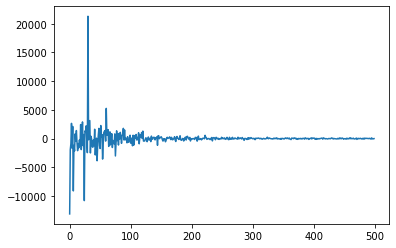

In [13]:
import matplotlib.pyplot as plt
plt.plot(pcs[:500,1])

In [49]:
pca.explained_variance_ratio_

array([0.54418887, 0.09666338, 0.02922066, 0.02204839, 0.01383418,
       0.0122552 , 0.01084841, 0.0094705 , 0.00771957, 0.00686806])

In [ ]:
#cov=transformed@transformed.T

In [9]:
from scipy.io import loadmat
regressors=loadmat('C:/Users/koester_lab/Documents/MishaAhrens/subject_1/data_full.mat')
beh=regressors['data']['Behavior_full'][0][0]

In [10]:
print(beh.shape)

(5, 2880)


In [11]:
beh_f=np.fft.fft(beh).real

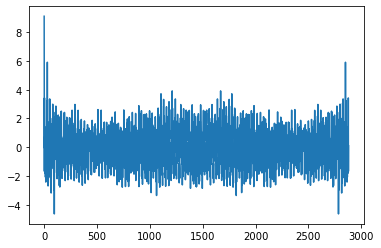

In [22]:
plt.plot(beh_f[1])

In [30]:
corr=np.corrcoef(beh_f,pcs.T)

In [17]:
print(corr)

[[ 1.00000000e+00  4.17466942e-02  1.55986464e-01  5.00428229e-01
   2.49317310e-01  2.34693598e-01  2.11985392e-01 -1.33052723e-01
   5.72132142e-02 -5.74480537e-02  6.69176505e-02 -8.43932281e-03
   8.38106950e-02 -2.96267398e-02 -3.63607125e-02]
 [ 4.17466942e-02  1.00000000e+00  1.66006432e-01  2.40312985e-01
   3.43183437e-01  1.68222599e-01  7.87433714e-02  3.99329998e-02
  -5.43223281e-02  1.34915914e-02  7.41032181e-02  1.27221524e-01
   6.40218019e-02  5.61856176e-02  7.04651955e-03]
 [ 1.55986464e-01  1.66006432e-01  1.00000000e+00  2.44165188e-01
   2.60204957e-01  1.91981146e-01  1.43153924e-01  3.96281546e-02
  -2.30227560e-02  8.83163816e-02  5.65104955e-02  4.14583473e-02
   3.23443132e-02  2.43504578e-02  3.02607400e-02]
 [ 5.00428229e-01  2.40312985e-01  2.44165188e-01  1.00000000e+00
   8.97098090e-01  7.56220768e-01  2.87499508e-01  3.53225373e-02
  -5.41030443e-02  2.97083752e-02  8.77770982e-02  4.38736062e-02
   1.74301547e-01 -3.70610104e-03 -4.42507203e-05]
 [ 2

In [20]:
print(corr.shape)

(15, 15)


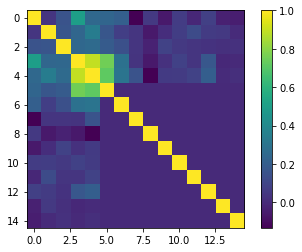

In [19]:
plt.imshow(corr)
plt.colorbar()

In [26]:
stim=regressors['data']['stim_full'][0][0]
stim_f=np.fft.fft(stim).real

In [27]:
print(stim.shape)

(1, 2880)


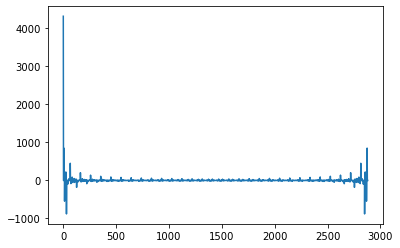

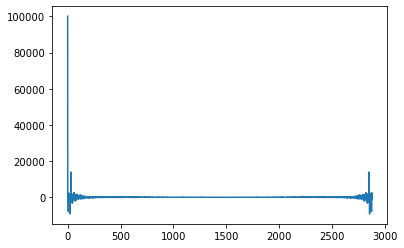

In [54]:
plt.plot(stim_f.T)
plt.show()
plt.plot(pcs.T[0,:])

In [29]:
corr_stim=np.corrcoef(stim_f,pcs.T)

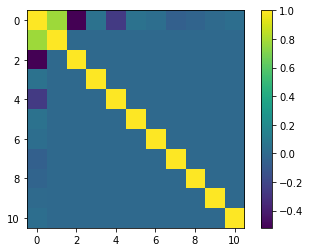

In [31]:
plt.imshow(corr_stim)
plt.colorbar()

In [33]:
print(transformed.shape)

(83205, 2880)


In [42]:
corr_s_=np.corrcoef(stim_f,transformed[:500,:])

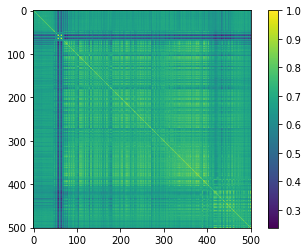

In [37]:
plt.imshow(corr_s_)
plt.colorbar()

(array([  319.,  2249.,  6608.,  5292., 20479., 86601., 97722., 26723.,
         3058.,  1449.]),
 array([0.23716243, 0.31344619, 0.38972994, 0.4660137 , 0.54229746,
        0.61858122, 0.69486497, 0.77114873, 0.84743249, 0.92371624,
        1.        ]),
 <a list of 10 Patch objects>)

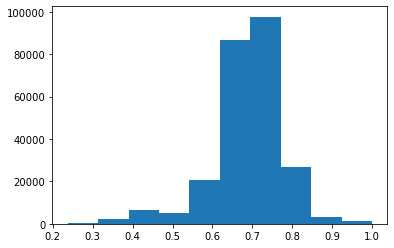

In [39]:
plt.hist(corr_s_[0:500,:].flatten())

In [41]:
corr_b_=np.corrcoef(beh_f,transformed[:500,:])

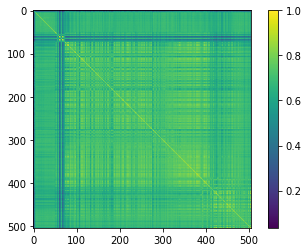

In [44]:
plt.imshow(corr_b_)
plt.colorbar()

(array([   784.,   1965.,    774.,   4675.,   7362.,  20439., 114538.,
         88669.,  11541.,   1753.]),
 array([0.03498764, 0.13148888, 0.22799011, 0.32449135, 0.42099259,
        0.51749382, 0.61399506, 0.71049629, 0.80699753, 0.90349876,
        1.        ]),
 <a list of 10 Patch objects>)

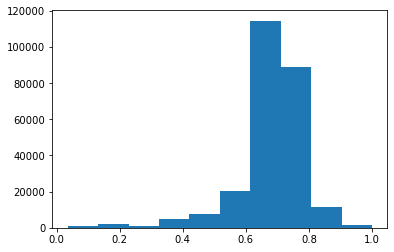

In [45]:
plt.hist(corr_b_[0:500,:].flatten())

In [58]:
ifft=np.fft.ifft(pcs.T).real
corr_stim=np.corrcoef(stim,ifft)

In [59]:
print(corr_stim)

[[ 1.00000000e+00 -3.71423083e-01 -3.99978894e-01  1.08658564e-01
  -3.91381525e-01  8.68127727e-02 -1.80572915e-02 -4.91611423e-02
  -1.47947238e-02  2.96327342e-02  5.80268410e-02]
 [-3.71423083e-01  1.00000000e+00  9.53089219e-01  5.86487755e-02
   5.28261043e-03  2.31609507e-02 -1.39343035e-01  7.34513072e-02
   6.58505090e-02  4.44613130e-02  3.06711448e-02]
 [-3.99978894e-01  9.53089219e-01  1.00000000e+00 -5.88993481e-03
  -5.30518000e-04 -2.32599042e-03  1.39938367e-02 -7.37651224e-03
  -6.61318504e-03 -4.46512707e-03 -3.08021850e-03]
 [ 1.08658564e-01  5.86487755e-02 -5.88993481e-03  1.00000000e+00
  -3.26456647e-05 -1.43130871e-04  8.61117064e-04 -4.53917012e-04
  -4.06945328e-04 -2.74763611e-04 -1.89542637e-04]
 [-3.91381525e-01  5.28261043e-03 -5.30518000e-04 -3.26456647e-05
   1.00000000e+00 -1.28920787e-05  7.75625057e-05 -4.08851971e-05
  -3.66543652e-05 -2.47484982e-05 -1.70724776e-05]
 [ 8.68127727e-02  2.31609507e-02 -2.32599042e-03 -1.43130871e-04
  -1.28920787e-05  

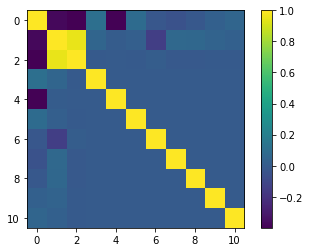

In [61]:
plt.imshow(corr_stim)
plt.colorbar()